In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# import seaborn as sns
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.fonttype'] = 'truetype'
plt.rcParams['font.sans-serif'] = 'Arial'
global_xtick_size = {'small': 6, 'medium': 7, 'large': 8}
X_LABEL_SIZE = 8
X_TICK_SIZE = 7

In [2]:
COLOR = {
    'general':'#8E9BAE',
    'gray': '#BAC2CD',
}
METHOD_COLOR = {
    'RNAFM': '#8D91AA',
    'SpliceBERT': '#78677A',
    'RNAMSM': '#E7ADAC',
    'RNAErnie': '#013E41',
    'SpTransformer': '#5B7493',
    'DNABERT': '#F8BB86',
    'DNABERT2': '#D3CCE3',
    'RNABERT': '#E6E6FA',
    'DeepM6A':'#E5CCC2'
}

## nRC task

In [142]:
def draw_epoch_performance(data:pd.DataFrame, column='f1s',skip_method=['nRC', 'RNACon']):
    methods = data['Method'].unique()
    for method in methods:
        if method in skip_method:
            continue
        method_data = data[data['Method'] == method]
        color = METHOD_COLOR[method] if method in METHOD_COLOR else COLOR['general']
        plt.plot(method_data['Epoch'], method_data[column], label=method,color=color,alpha=0.8)
    plt.xticks(fontsize=X_TICK_SIZE)
    plt.yticks(fontsize=X_TICK_SIZE)
    plt.ylim(0,1)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    

meta NOT subset; don't know how to subset; dropped


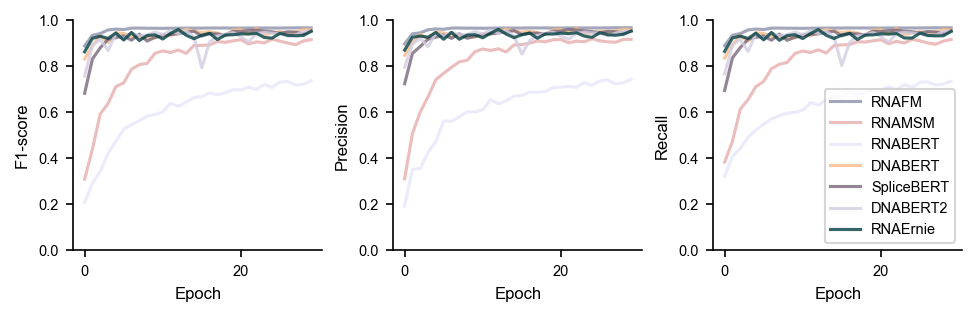

In [143]:
def draw_nRC_supp(finput):
    # Load the data
    data = pd.read_csv(finput, sep=',', header=0)

    fig = plt.figure(figsize=(6.4, 2), dpi=150, constrained_layout=True)
    gs1 = fig.add_gridspec(nrows=1, ncols=3)
    #
    ax1 = fig.add_subplot(gs1[0, 0])
    draw_epoch_performance(data, column='f1s')
    plt.xlabel('Epoch', size=X_LABEL_SIZE)
    plt.ylabel('F1-score', size=X_LABEL_SIZE)
    

    #
    ax2 = fig.add_subplot(gs1[0, 1])
    draw_epoch_performance(data, column='precision')
    plt.xlabel('Epoch', size=X_LABEL_SIZE)
    plt.ylabel('Precision', size=X_LABEL_SIZE)

    #
    ax3 = fig.add_subplot(gs1[0, 2])
    draw_epoch_performance(data, column='recall')
    plt.xlabel('Epoch', size=X_LABEL_SIZE)
    plt.ylabel('Recall', size=X_LABEL_SIZE)

    plt.legend(prop={'size': X_TICK_SIZE},
               loc='lower right')
    

draw_nRC_supp('./tables/nRCcls_collected_data.csv')
plt.savefig('figures/nRCcls_performance_sup.png', dpi=150)
plt.savefig('figures/nRCcls_performance_sup.pdf', dpi=150)

In [5]:
def draw_performance_bar(data:pd.DataFrame, column='f1s'):
    plt.barh(data.index, data[column],height=0.65,color=COLOR['general'])
    # display the value on the bar
    for i, v in enumerate(data[column]):
        plt.text(v - 0.02, i, '{:.4f}'.format(v), color='white',
                 va='center', ha='right', fontsize=X_TICK_SIZE)
    plt.xticks(fontsize=X_TICK_SIZE)
    plt.yticks(fontsize=X_TICK_SIZE)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

  Method  Epoch     f1s  precision  recall  accuracy     mcc      Time
0  RNAFM      0  0.8870     0.8962  0.8885    0.8885  0.8800  24.3011s
1  RNAFM      1  0.9334     0.9400  0.9338    0.9338  0.9289  24.3167s
2  RNAFM      2  0.9410     0.9442  0.9408    0.9408  0.9361  24.4887s
3  RNAFM      3  0.9567     0.9575  0.9569    0.9569  0.9534  24.2017s
4  RNAFM      4  0.9605     0.9612  0.9608    0.9608  0.9576  24.4347s


meta NOT subset; don't know how to subset; dropped


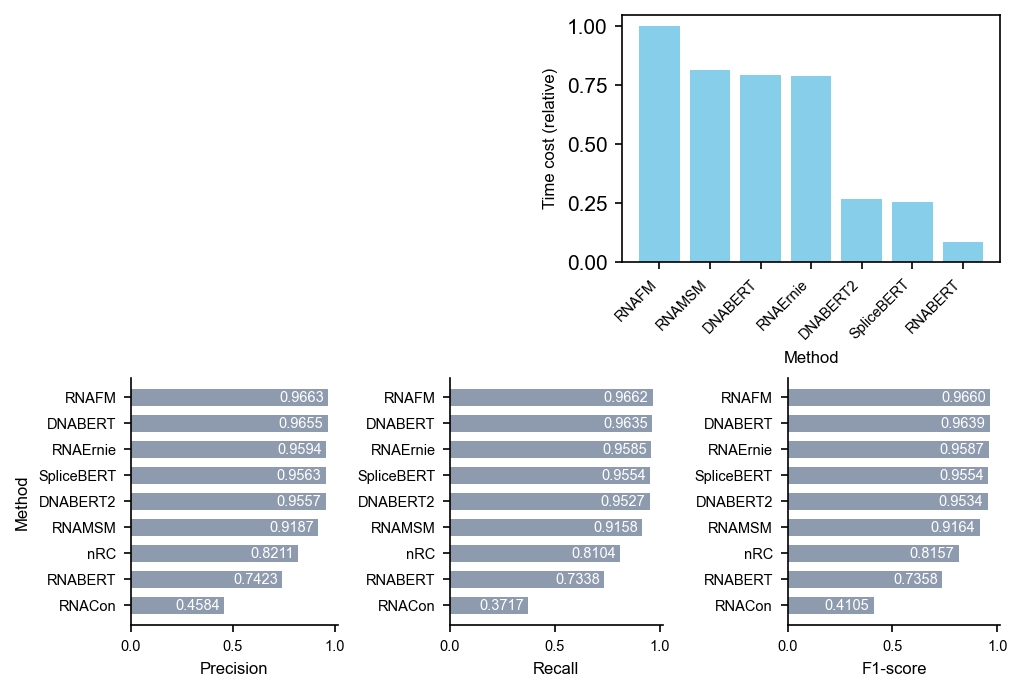

In [121]:
def draw_nRC(finput):
    # Load the data
    data = pd.read_csv(finput, sep=',', header=0)
    print(data.head())

    performance = []
    methods = data['Method'].unique()
    for method in methods:
        method_data = data[data['Method'] == method]
        best_epoch = method_data.loc[method_data['f1s'].idxmax()]
        performance.append(best_epoch)
    performance = pd.DataFrame(performance)
    performance.set_index('Method', inplace=True)
    performance.sort_values('f1s', ascending=True, inplace=True)

    # Plot the data

    fig = plt.figure(figsize=(6.7, 4.5), dpi=150, constrained_layout=True)
    gs1 = fig.add_gridspec(nrows=2, ncols=6)

    ax1 = fig.add_subplot(gs1[0, 3:6])
    # Convert the time to float
    data['Time'] = data['Time'].apply(lambda x: float(str(x).split('s')[0]))
    # Calculate the average time cost
    time_cost = data.groupby('Method')['Time'].mean()
    time_cost = time_cost[~time_cost.index.isin(['nRC', 'RNACon'])]
    time_cost.sort_values(ascending=False, inplace=True)
    plt.xlabel('Method', size=X_LABEL_SIZE)
    plt.ylabel('Time cost (relative)', size=X_LABEL_SIZE)
    plt.bar(time_cost.index, time_cost.values /
            time_cost.values.max(), color='skyblue')
    plt.xticks(fontsize=X_TICK_SIZE, ha='right', rotation=45)


    ax2 = fig.add_subplot(gs1[1, 0:2])
    
    draw_performance_bar(performance, column='precision')
    plt.xlabel('Precision', size=X_LABEL_SIZE)
    plt.ylabel('Method', size=X_LABEL_SIZE)


    ax3 = fig.add_subplot(gs1[1, 2:4])
    draw_performance_bar(performance, column='recall')
    plt.xlabel('Recall', size=X_LABEL_SIZE)
    plt.ylabel(None, size=X_LABEL_SIZE)

    ax4 = fig.add_subplot(gs1[1, 4:])
    draw_performance_bar(performance, column='f1s')
    plt.xlabel('F1-score', size=X_LABEL_SIZE)
    plt.ylabel(None, size=X_LABEL_SIZE)
    
    return

draw_nRC('./tables/nRCcls_collected_data.csv')
plt.savefig('figures/nRCcls_performance.png', dpi=150)
plt.savefig('figures/nRCcls_performance.pdf', dpi=150)

## m6A task

In [3]:
finput_short = f'tables\m6A_short_miclip_collected_data.csv'
finput_long = f'tables\m6A_long_miclip_collected_data.csv'
data_short = pd.read_csv(finput_short, sep=',', header=0)
data_long = pd.read_csv(finput_long, sep=',', header=0)
data_short['Method'] = data_short['Method'].astype(str)
data_long['Method'] = data_long['Method'].astype(str)

data_long['Method'] = data_long['Method'] + '+'

data = pd.concat([data_short, data_long])
data['Time'] = data['Time'].apply(lambda x: float(str(x).split('s')[0]))

data.head()

KeyError: 'Time'

In [78]:
def load_result(finput_short,finput_long):
    data_short = pd.read_csv(finput_short, sep=',', header=0)
    data_long = pd.read_csv(finput_long, sep=',', header=0)
    data_short['Method'] = data_short['Method'].astype(str)
    data_long['Method'] = data_long['Method'].astype(str)
    data_long['Method'] = data_long['Method'] + '+'
    data = pd.concat([data_short, data_long])
    return data

In [76]:
def draw_epoch_performance_m6A(data,column='f1s',legend=False):
    methods = data['Method'].unique()
    for method in methods:
        if method in ['nRC', 'RNACon']:
            continue
        method_data = data[data['Method'] == method]
        line_style = '-' if '+' in method else '--'
        method_name = method.strip('+')
        color = METHOD_COLOR[method_name] if method_name in METHOD_COLOR else METHOD_COLOR['']
        plt.plot(method_data['Epoch']+1,
                 method_data[column],
                 line_style,
                 color=color,
                 label=method,
                 alpha=0.8)

    plt.xticks(np.arange(1, 11, 1), fontsize=X_TICK_SIZE)
    plt.xlim(0, 10)
    plt.ylim(0,1)
    plt.yticks(fontsize=X_TICK_SIZE)
    plt.xticks(fontsize=X_TICK_SIZE)

    if legend:
        plt.legend(prop={'size': X_TICK_SIZE},
                loc='lower right', ncol=1)

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

meta NOT subset; don't know how to subset; dropped


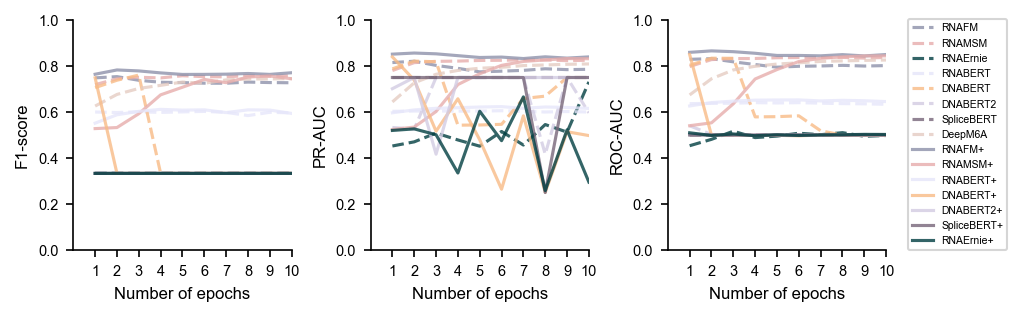

In [80]:
def draw_m6a_supp(data):
    fig = plt.figure(figsize=(6.7, 2), dpi=150, constrained_layout=True)
    gs1 = fig.add_gridspec(nrows=1, ncols=3)
    #
    ax1 = fig.add_subplot(gs1[0, 0])
    draw_epoch_performance_m6A(data, column='f1s')
    plt.ylabel('F1-score', size=X_LABEL_SIZE)
    plt.xlabel('Number of epochs', size=X_LABEL_SIZE)
    #
    ax2 = fig.add_subplot(gs1[0, 1])
    draw_epoch_performance_m6A(data, column='pr_auc')
    plt.ylabel('PR-AUC', size=X_LABEL_SIZE)
    plt.xlabel('Number of epochs', size=X_LABEL_SIZE)
    #
    ax3 = fig.add_subplot(gs1[0, 2])
    draw_epoch_performance_m6A(data, column='auc')
    plt.ylabel('ROC-AUC', size=X_LABEL_SIZE)
    plt.xlabel('Number of epochs', size=X_LABEL_SIZE)

    plt.legend(prop={'size': X_TICK_SIZE-2},
                loc = (1.1,0.0))
    

# Load result
finput_short = f'tables\m6A_short_miclip_collected_data.csv'
finput_long = f'tables\m6A_long_miclip_collected_data.csv'
data = load_result(finput_short,finput_long)
    
draw_m6a_supp(data)
plt.savefig('figures/m6A_miclip_supp.png')
plt.savefig('figures/m6A_miclip_supp.pdf')

meta NOT subset; don't know how to subset; dropped


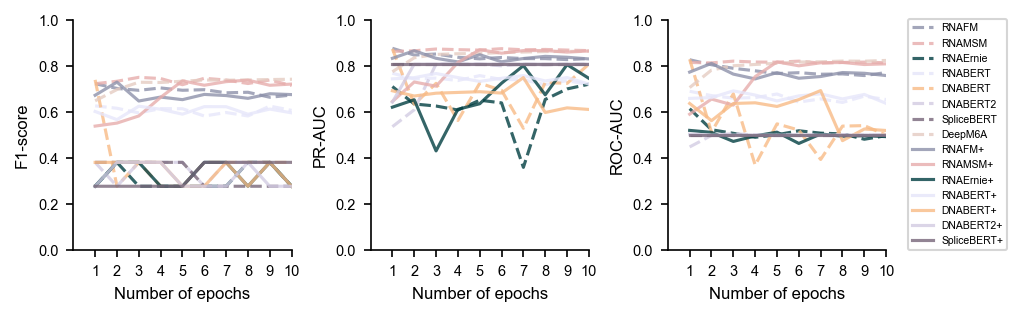

In [81]:
finput_short = f'tables\m6A_short_seq_collected_data.csv'
finput_long = f'tables\m6A_long_seq_collected_data.csv'
data = load_result(finput_short,finput_long)
draw_m6a_supp(data)
plt.savefig('figures/m6A_seq_supp.png')
plt.savefig('figures/m6A_seq_supp.pdf')

In [82]:
def deprecated_backup():
    performance.sort_values('f1s', ascending=True, inplace=True)
    plt.barh(performance.index, performance['f1s'],
             height=0.65, label=method, color=COLOR['general'])
    # display the value on the bar
    for i, v in enumerate(performance['f1s']):
        plt.text(v - 0.02, i, '{:.4f}'.format(v), color='white',
                 va='center', ha='right', fontsize=X_TICK_SIZE)
    plt.xlabel('F1-score', size=X_LABEL_SIZE)
    plt.ylabel('Method', size=X_LABEL_SIZE)
    plt.xticks(fontsize=X_TICK_SIZE)
    plt.yticks(fontsize=X_TICK_SIZE)
    plt.xlim(0, 1)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # accuracy
    ax2 = fig.add_subplot(gs1[0, 2:4])
    performance.sort_values('accuracy', ascending=True, inplace=True)
    plt.barh(performance.index, performance['accuracy'],
             height=0.65, label=method, color=COLOR['general'])
    # display the value on the bar
    for i, v in enumerate(performance['accuracy']):
        plt.text(v - 0.02, i, '{:.4f}'.format(v), color='white',
                 va='center', ha='right', fontsize=X_TICK_SIZE)
    plt.xlabel('Accuracy', size=X_LABEL_SIZE)
    plt.ylabel(None, size=X_LABEL_SIZE)
    plt.xticks(fontsize=X_TICK_SIZE)
    plt.yticks(fontsize=X_TICK_SIZE)
    plt.xlim(0, 1)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # prauc
    ax2 = fig.add_subplot(gs1[0, 4:6])
    performance.sort_values('pr_auc', ascending=True, inplace=True)
    plt.barh(performance.index, performance['pr_auc'],
             height=0.65, label=method, color=COLOR['general'])
    # display the value on the bar
    for i, v in enumerate(performance['pr_auc']):
        plt.text(v - 0.02, i, '{:.4f}'.format(v), color='white',
                 va='center', ha='right', fontsize=X_TICK_SIZE)
    plt.xlabel('PR-AUC', size=X_LABEL_SIZE)
    plt.ylabel(None, size=X_LABEL_SIZE)
    plt.xticks(fontsize=X_TICK_SIZE)
    plt.yticks(fontsize=X_TICK_SIZE)
    plt.xlim(0, 1)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

In [138]:
def draw_performance_curve(data:pd.DataFrame,column='pr_auc',group='clip'):
    methods = data['Method'].unique()
    print(group,column)
    for method in methods:
        # if '+' in method:
        #     continue
        # if method not in ['DNABERT2','DNABERT2+']:
        #     continue
        method_data = data[data['Method'] == method]
        best_epoch = method_data.loc[method_data['pr_auc'].idxmax()]['Epoch']
        best_perf = method_data.loc[method_data['pr_auc'].idxmax()][column]

        print(method, best_perf)

        if '+' in method:
            folder = f'm6a_512_{group}'
        else:
            folder = f'm6a_101_{group}'

        method_name = method.strip('+')
        line_style = '-' if '+' in method else '--'
        color = METHOD_COLOR[method_name] if method_name in METHOD_COLOR else METHOD_COLOR['']

        if column == 'pr_auc':
            precision = np.load(f'tables/{folder}/{method_name}/epoch_{best_epoch}_pr_auc_1.npy')
            recall = np.load(f'tables/{folder}/{method_name}/epoch_{best_epoch}_pr_auc_2.npy')
            plt.plot(recall, precision, label=f'{method}={best_perf}', alpha=0.8, color=color, linestyle=line_style, linewidth=1)
        
        elif column == 'auc':
            fpr = np.load(f'tables/{folder}/{method_name}/epoch_{best_epoch}_auc_1.npy')
            tpr = np.load(f'tables/{folder}/{method_name}/epoch_{best_epoch}_auc_2.npy')
            plt.plot(fpr, tpr, label=f'{method}={best_perf}', alpha=0.8, color=color, linestyle=line_style, linewidth=1)
        else:
            raise ValueError('Invalid column name')
        plt.xticks(fontsize=X_TICK_SIZE)
        plt.yticks(fontsize=X_TICK_SIZE)
        plt.xlim(0, 1)
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)

clip pr_auc
RNAFM 0.8209
RNAMSM 0.8268
RNAErnie 0.7309
RNABERT 0.6057
DNABERT 0.8214
DNABERT2 0.7501
SpliceBERT 0.7501
DeepM6A 0.8207
RNAFM+ 0.8564
RNAMSM+ 0.8324
RNABERT+ 0.6235
DNABERT+ 0.8395
DNABERT2+ 0.7501
SpliceBERT+ 0.7501
RNAErnie+ 0.6658
clip auc
RNAFM 0.8319
RNAMSM 0.837
RNAErnie 0.4981
RNABERT 0.6407
DNABERT 0.834
DNABERT2 0.5
SpliceBERT 0.5
DeepM6A 0.8348
RNAFM+ 0.8658
RNAMSM+ 0.8437
RNABERT+ 0.6527
DNABERT+ 0.8499
DNABERT2+ 0.5
SpliceBERT+ 0.5
RNAErnie+ 0.5006


meta NOT subset; don't know how to subset; dropped


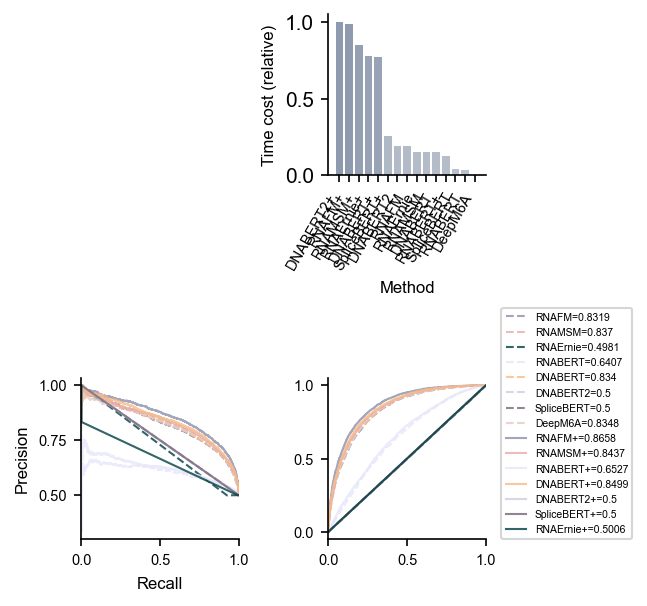

In [139]:
def draw_m6a(finput_short, finput_long,group='clip'):

    data = load_result(finput_short,finput_long)
    data['Time'] = data['Time'].apply(lambda x: float(str(x).split('s')[0]))

    fig = plt.figure(figsize=(4.2, 5), dpi=150, constrained_layout=True)
    gs1 = fig.add_gridspec(nrows=3, ncols=4)

    # performance

    methods = data['Method'].unique()
    performance = []
    for method in methods:
        method_data = data[data['Method'] == method]
        best_epoch = method_data.loc[method_data['pr_auc'].idxmax()]
        performance.append(best_epoch)
    performance = pd.DataFrame(performance)
    performance.set_index('Method', inplace=True)

    # time
    ax1 = fig.add_subplot(gs1[0, 2:])
    time_cost = data.groupby('Method')['Time'].mean()
    time_cost.sort_values(ascending=False, inplace=True)
    time_cost = time_cost[~time_cost.index.isin(['nRC', 'RNACon'])]

    plt.xlabel('Method', size=X_LABEL_SIZE)
    plt.ylabel('Time cost (relative)', size=X_LABEL_SIZE)

    cmap = LinearSegmentedColormap.from_list(
        "my_colormap", [COLOR['gray'],COLOR['general']])
    relative_time = time_cost.values / time_cost.values.max()
    plt.bar(time_cost.index, relative_time, color=[
            cmap(v) for v in relative_time])
    plt.xticks(fontsize=X_TICK_SIZE, rotation=60, ha='right')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    ax1 = fig.add_subplot(gs1[1, 0:2])
    draw_performance_curve(data,column='pr_auc',group=group)
    plt.xlabel('Recall', size=X_LABEL_SIZE)
    plt.ylabel('Precision', size=X_LABEL_SIZE)

    ax2 = fig.add_subplot(gs1[1, 2:])
    draw_performance_curve(data,column='auc',group=group)
    plt.legend(prop={'size': X_TICK_SIZE-2},
                loc = (1.1,0.0))
    plt.xlabel('FPR', size=X_LABEL_SIZE)
    plt.ylabel('TPR', size=X_LABEL_SIZE)

# miclip
finput1 = f'tables\m6A_short_miclip_collected_data.csv'
finput2 = f'tables\m6A_long_miclip_collected_data.csv'

draw_m6a(finput1, finput2)

plt.savefig('figures/m6A_miclip.png')
plt.savefig('figures/m6A_miclip.pdf')

seq pr_auc
RNAFM 0.877
RNAMSM 0.8754
RNAErnie 0.721
RNABERT 0.7687
DNABERT 0.8744
DNABERT2 0.8087
SpliceBERT 0.8081
DeepM6A 0.8791
RNAFM+ 0.8665
RNAMSM+ 0.8711
RNAErnie+ 0.806
RNABERT+ 0.7673
DNABERT+ 0.7496
DNABERT2+ 0.8081
SpliceBERT+ 0.8081
seq auc
RNAFM 0.8272
RNAMSM 0.8212
RNAErnie 0.4973
RNABERT 0.6902
DNABERT 0.8295
DNABERT2 0.5062
SpliceBERT 0.5
DeepM6A 0.8334
RNAFM+ 0.8115
RNAMSM+ 0.818
RNAErnie+ 0.4974
RNABERT+ 0.6919
DNABERT+ 0.6933
DNABERT2+ 0.5
SpliceBERT+ 0.5


meta NOT subset; don't know how to subset; dropped


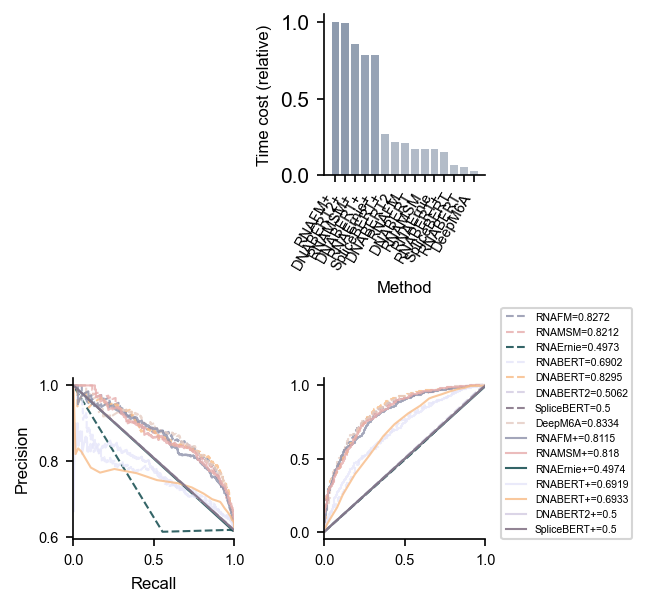

In [140]:
finput1 = f'tables\m6A_short_seq_collected_data.csv'
finput2 = f'tables\m6A_long_seq_collected_data.csv'

draw_m6a(finput1, finput2,group='seq')
plt.savefig('figures/m6A_seq.png')
plt.savefig('figures/m6A_seq.pdf')

## Splicing task

In [21]:
tissue_names_53 = ['Subcutaneous - Adipose',
  'Visceral (Omentum) - Adipose',
  'Adrenal Gland',
  'Aorta - Artery',
  'Coronary - Artery',
  'Tibial - Artery',
  'Bladder',
  'Amygdala - Brain',
  'Anterior cingulate cortex (BA24) - Brain',
  'Caudate (basal ganglia) - Brain',
  'Cerebellar Hemisphere - Brain',
  'Cerebellum - Brain',
  'Cortex - Brain',
  'Frontal Cortex (BA9) - Brain',
  'Hippocampus - Brain',
  'Hypothalamus - Brain',
  'Nucleus accumbens (basal ganglia) - Brain',
  'Putamen (basal ganglia) - Brain',
  'Spinal cord (cervical c-1) - Brain',
  'Substantia nigra - Brain',
  'Breast - Mammary Tissue',
  'Cells - EBV-transformed lymphocytes',
  'Cells - Cultured fibroblasts',
  'Cervix - Ectocervix',
  'Cervix - Endocervix',
  'Colon - Sigmoid',
  'Colon - Transverse',
  'Esophagus - Gastroesophageal Junction',
  'Esophagus - Mucosa',
  'Esophagus - Muscularis',
  'Fallopian Tube',
  'Heart - Atrial Appendage',
  'Heart - Left Ventricle',
  'Kidney - Cortex',
  'Liver',
  'Lung',
  'Minor Salivary Gland',
  'Muscle - Skeletal',
  'Nerve - Tibial',
  'Ovary',
  'Pancreas',
  'Pituitary',
  'Prostate',
  'Skin - Not Sun Exposed (Suprapubic)',
  'Skin - Sun Exposed (Lower leg)',
  'Small Intestine - Terminal Ileum',
  'Spleen',
  'Stomach',
  'Testis',
  'Thyroid',
  'Uterus',
  'Vagina',
  'Whole Blood']

In [4]:
finput_3 = 'tables/splice3cls_collected_data.csv'
finput_15 = 'tables/splice15cls_collected_data.csv'
finput_53 = 'tables/splice53cls_collected_data.csv'

data = pd.read_csv(finput_3, sep=',', header=0)
data['Time'] = data['Time'].apply(lambda x: float(str(x).split('s')[0]))
data['Epoch'] = data['Epoch'].astype(int)
data.head()

,Method,Epoch,topk_0_topkl,topk_0_threshold,topk_1_topkl,topk_1_threshold,pr_auc_0,pr_auc_1,roc_auc_0,roc_auc_1,Time
0,SpliceBERT,0,0.841310,0.0457,0.851627,0.0594,0.889194,0.898625,0.998995,0.998697,262.4976
1,SpliceBERT,1,0.837493,0.0400,0.845219,0.0368,0.883996,0.890234,0.998945,0.998894,262.3236
2,SpliceBERT,2,0.833661,0.0396,0.846071,0.0406,0.882721,0.893143,0.998924,0.998959,262.1850
3,SpliceBERT,3,0.832875,0.0401,0.843582,0.0388,0.880214,0.894378,0.998833,0.998810,262.6109
4,SpliceBERT,4,0.834349,0.0377,0.845590,0.0425,0.883477,0.891703,0.999006,0.998929,262.3952


meta NOT subset; don't know how to subset; dropped


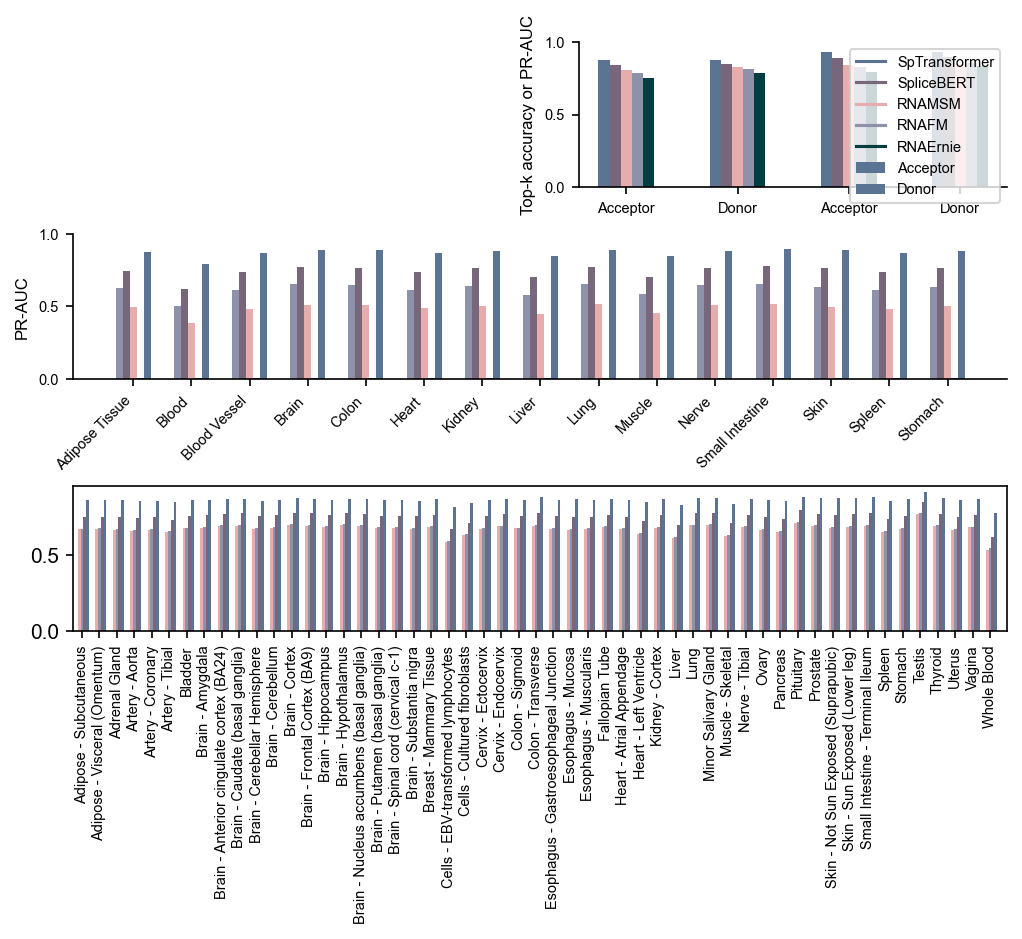

In [26]:
fig = plt.figure(figsize=(6.7, 6), dpi=150, constrained_layout=True)
gs1 = fig.add_gridspec(nrows=3, ncols=2)


# find the best epoch for each method
df_performance = []
methods = data['Method'].unique()
for method in methods:
    method_data = data[data['Method'] == method]
    best_epoch = method_data.loc[(method_data['topk_0_topkl']+method_data['topk_1_topkl']).idxmax()]
    df_performance.append(best_epoch)
df_performance = pd.DataFrame(df_performance)
df_performance = df_performance.sort_values(by='topk_0_topkl', ascending=False)

# plot the performance
ax1 = fig.add_subplot(gs1[0, 1])
# topkl
cnt_methods = df_performance.shape[0]
color_list = [METHOD_COLOR[method] for method in df_performance['Method']]
ax1.bar( 1 - 0.2 + np.arange(cnt_methods)*0.1, df_performance['topk_0_topkl'], 
        width=0.1,
        color=color_list, label='Acceptor')
ax1.bar( 2 - 0.2 + np.arange(cnt_methods)*0.1, df_performance['topk_1_topkl'], 
        width=0.1,
        color=color_list, label='Donor')
plt.xticks([1,2,3,4], ['Acceptor', 'Donor','Acceptor', 'Donor'], fontsize=X_TICK_SIZE)
plt.ylabel('Top-k accuracy or PR-AUC', fontsize=X_LABEL_SIZE)

# pr_auc
ax1.bar( 3 - 0.2 + np.arange(cnt_methods)*0.1, df_performance['pr_auc_0'],
        width=0.1,
        color=color_list)
ax1.bar( 4 - 0.2 + np.arange(cnt_methods)*0.1, df_performance['pr_auc_1'],
        width=0.1,
        color=color_list)

for method in df_performance['Method']:
    plt.plot([], label=method, color=METHOD_COLOR[method])
plt.legend(loc='upper right', fontsize=X_TICK_SIZE)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(0,1)
plt.yticks(fontsize=X_TICK_SIZE)


data_15 = pd.read_csv(finput_15, sep=',', header=0)
data_15['Time'] = data_15['Time'].apply(lambda x: float(str(x).split('s')[0]))
data_15['Epoch'] = data_15['Epoch'].astype(int)
data_15.head()

ax2 = fig.add_subplot(gs1[1, :])
# find the best epoch for each method
df_performance = []
methods = data_15['Method'].unique()
for method in methods:
    method_data = data_15[data_15['Method'] == method]
    columns = [f'pr_auc_{i}' for i in range(15)]
    avg_pr_auc = method_data[columns].mean(axis=1)
    best_epoch = method_data.loc[(avg_pr_auc).idxmax()]
    df_performance.append(best_epoch)
df_performance = pd.DataFrame(df_performance)

width = 0.6 / len(methods)
for idx, method in enumerate(methods):
    method_data = df_performance[df_performance['Method'] == method]
    pr_auc = []
    for i in range(15):
        pr_auc.append(method_data[f'pr_auc_{i}'].max())
    plt.bar(np.arange(15)+(idx - len(methods)//2) *
        width, pr_auc, width=width, label=method, color=METHOD_COLOR[method])

plt.ylim(0,1)
plt.yticks(fontsize=X_TICK_SIZE)
plt.ylabel('PR-AUC', fontsize=X_LABEL_SIZE)
tissue_classes = ['Adipose Tissue', 'Blood', 'Blood Vessel', 'Brain', 'Colon', 'Heart', 'Kidney',
                      'Liver', 'Lung', 'Muscle', 'Nerve', 'Small Intestine', 'Skin', 'Spleen', 'Stomach']
plt.xticks(np.arange(15), tissue_classes, fontsize=X_TICK_SIZE, rotation=45, ha='right')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# ax3 = fig.add_subplot(gs1[2, :])
# data_53 = pd.read_csv(finput_53, sep=',', header=0)


data_53 = pd.read_csv(finput_53, sep=',', header=0)
data_53['Time'] = data_53['Time'].apply(lambda x: float(str(x).split('s')[0]))
data_53['Epoch'] = data_53['Epoch'].astype(int)
data_53.head()


ax3 = fig.add_subplot(gs1[2, :])

methods = data_53['Method'].unique()
df_performance = []
for method in methods:
    method_data = data_53[data_53['Method'] == method]
    columns = [f'pr_auc_{i}' for i in range(53)]
    avg_pr_auc = method_data[columns].mean(axis=1)
    best_epoch = method_data.loc[(avg_pr_auc).idxmax()]
    df_performance.append(best_epoch)
df_performance = pd.DataFrame(df_performance)
df_performance.sort_values('pr_auc_0', ascending=True, inplace=True)
methods = df_performance['Method'].unique()

width = 0.8 / len(methods)
for idx, method in enumerate(methods):
    method_data = df_performance[df_performance['Method'] == method]
    pr_auc = []
    for i in range(53):
        pr_auc.append(method_data[f'pr_auc_{i}'].max())
    plt.bar(np.arange(53)+(idx - len(methods)//2) *
        width, pr_auc, width=width, label=method, color=METHOD_COLOR[method])
plt.xlim(-0.5,53)
plt.xticks(np.arange(53), tissue_names_53, fontsize=X_TICK_SIZE, rotation=90, ha='center')
    
plt.savefig('figures/figure4.pdf')
plt.savefig('figures/figure4.png')

NameError: name 'methods' is not defined

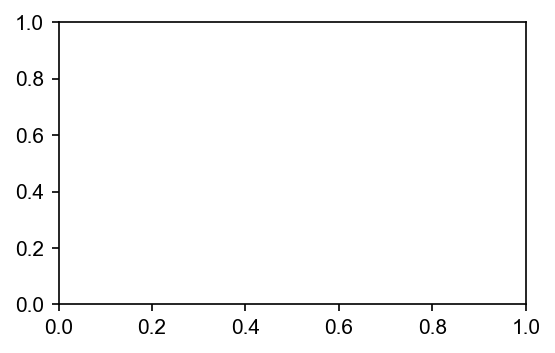

In [17]:
fig = plt.figure(figsize=(6.7, 6), dpi=150, constrained_layout=True)
gs1 = fig.add_gridspec(nrows=3, ncols=2)

# plot the learning curve
ax1 = fig.add_subplot(gs1[0, 0])
for idx, method in enumerate(methods):
    method_data = data[data['Method'] == method]

    columns = [f'topk_{i}_topkl' for i in range(2)]

    avg_pr_auc = method_data[columns].mean(axis=1)
    plt.plot(method_data['Epoch'] + 1, avg_pr_auc, label=method,
                color=METHOD_COLOR[method])
plt.ylabel('Top-k accuracy', fontsize=X_LABEL_SIZE)
plt.yticks(fontsize=X_TICK_SIZE)
plt.ylim(0,1)
plt.xlabel('Number of trained epochs', fontsize=X_LABEL_SIZE)
plt.xticks(np.arange(1,11,1),fontsize=X_TICK_SIZE)

plt.legend(loc='lower right', fontsize=X_TICK_SIZE)


# plot the time
ax2 = fig.add_subplot(gs1[0, 1])
# find the best epoch for each method

time_cost = data_15.groupby('Method')['Time'].mean()
time_cost.sort_values(ascending=False, inplace=True)
print(time_cost)
plt.bar(time_cost.index, time_cost.values /
        time_cost.values.max(), width=0.4, color=COLOR['general'])
plt.xticks(fontsize=X_TICK_SIZE, rotation=45, ha='right')
plt.yticks(fontsize=X_TICK_SIZE)
plt.ylabel('Relative time cost', size=X_LABEL_SIZE)


plt.savefig('figures/figure4s1.pdf')
plt.savefig('figures/figure4s1.png')

## Mean ribosome loading

meta NOT subset; don't know how to subset; dropped


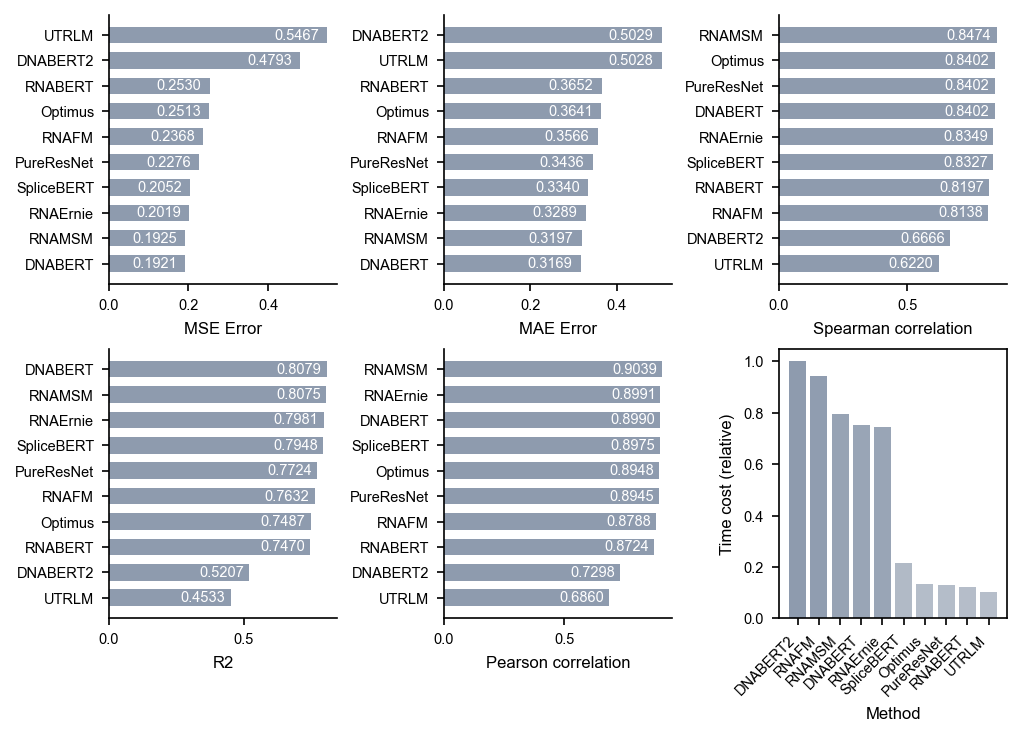

In [6]:
def solve(finput):
    data = pd.read_csv(finput, sep=',', header=0)
    data['Time'] = data['Time'].apply(lambda x: float(str(x).split('s')[0]))

    fig = plt.figure(figsize=(6.7, 4.8), dpi=150, constrained_layout=True)
    gs1 = fig.add_gridspec(nrows=2, ncols=6)

    # performance
    ax1 = fig.add_subplot(gs1[0, 0:2])

    methods = data['Method'].unique()
    performance = []
    for method in methods:
        method_data = data[data['Method'] == method]
        best_epoch = method_data.loc[method_data['mse'].idxmin()]
        performance.append(best_epoch)
    performance = pd.DataFrame(performance)
    performance.set_index('Method', inplace=True)

    performance.sort_values('mse', ascending=True, inplace=True)
    draw_performance_bar(performance, column='mse')
    plt.xlabel('MSE Error', size=X_LABEL_SIZE)
    plt.ylabel(None, size=X_LABEL_SIZE)

    ax2 = fig.add_subplot(gs1[0, 2:4])
    performance.sort_values('mae', ascending=True, inplace=True)
    draw_performance_bar(performance, column='mae')
    plt.xlabel('MAE Error', size=X_LABEL_SIZE)
    plt.ylabel(None, size=X_LABEL_SIZE)

    # display the value on the bar
    ax3 = fig.add_subplot(gs1[0, 4:6])
    performance.sort_values('spearman', ascending=True, inplace=True)
    draw_performance_bar(performance, column='spearman')
    plt.xlabel('Spearman correlation', size=X_LABEL_SIZE)
    plt.ylabel(None, size=X_LABEL_SIZE)

    # display the value on the bar
    ax4 = fig.add_subplot(gs1[1, 0:2])
    performance.sort_values('r2', ascending=True, inplace=True)

    draw_performance_bar(performance, column='r2')
    plt.xlabel('R2', size=X_LABEL_SIZE)
    plt.ylabel(None, size=X_LABEL_SIZE)

    # display the value on the bar
    ax4 = fig.add_subplot(gs1[1, 2:4])
    performance.sort_values('pearson', ascending=True, inplace=True)

    draw_performance_bar(performance, column='pearson')
    plt.xlabel('Pearson correlation', size=X_LABEL_SIZE)
    plt.ylabel(None, size=X_LABEL_SIZE)

    # time

    ax6 = fig.add_subplot(gs1[1, 4:6])
    time_cost = data.groupby('Method')['Time'].mean()
    time_cost.sort_values(ascending=False, inplace=True)

    plt.xlabel('Method', size=X_LABEL_SIZE)
    plt.ylabel('Time cost (relative)', size=X_LABEL_SIZE)

    cmap = LinearSegmentedColormap.from_list(
        "my_colormap", [COLOR['gray'],COLOR['general']])
    relative_time = time_cost.values / time_cost.values.max()
    plt.bar(time_cost.index, relative_time, color=[
            cmap(v) for v in relative_time])
    plt.xticks(fontsize=X_TICK_SIZE, rotation=45, ha='right')
    plt.yticks(fontsize=X_TICK_SIZE)

    return
    ax3 = fig.add_subplot(gs1[1, 0:3])

    for method in methods:
        if method in ['nRC', 'RNACon']:
            continue
        method_data = data[data['method'] == method]
        line_style = '-' if '+' in method else '--'
        method_name = method.strip('+') 
        print(method_name)
        color = METHOD_COLOR[method_name] if method_name in METHOD_COLOR else METHOD_COLOR['']
        plt.plot(method_data['Epoch']+1,
                 method_data['f1s'],
                 line_style,
                 color=color,
                 label=method,
                 alpha=0.8)

    plt.xticks(np.arange(1, 11, 1), fontsize=X_TICK_SIZE)
    plt.xlim(1, 10)
    plt.ylim(0,1)
    plt.ylabel('F1-score', size=X_LABEL_SIZE)
    plt.xlabel('Number of epochs', size=X_LABEL_SIZE)
    plt.yticks(fontsize=X_TICK_SIZE)
    plt.xticks(fontsize=X_TICK_SIZE)


    plt.legend(prop={'size': X_TICK_SIZE},
               loc='lower right')

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)



    # curve
    ax5 = fig.add_subplot(gs1[2, 0:3])

    methods = data['method'].unique()
    performance = []
    for method in methods:
        if method !='DeepM6A':
            continue
        method_data = data[data['method'] == method]
        best_epoch = method_data.loc[method_data['f1s'].idxmax()]['Epoch']
        print(best_epoch)

        precision = np.load(f'tables/curves/{method}/epoch_{best_epoch}_pr_auc_1.npy')
        recall = np.load(f'tables/curves/{method}/epoch_{best_epoch}_pr_auc_2.npy')
        plt.plot(recall, precision, label=method, alpha=0.8)


# miclip
finput = f'tables\mrl_regress_collected_data.csv'

solve(finput)

plt.savefig('figures/mrl.png')
plt.savefig('figures/mrl.pdf')